(error-analysis-section)=

# Error analysis

In {prf:ref}`euler-example` in the previous section we solved the following IVP using the Euler method

$$y' = ty, \qquad t\in [0,1], \qquad y(0)=1.$$

This IVP is quite simple we can use analytical methods to determine the solution which is $y = e^{t^2/2}$. Since we have an exact solution we can calculate the absolute error between the numerical solution and the exact solution using

$$ \begin{align*}
    \text{error} &= | y_\text{exact} - y_\text{numerical} |.
\end{align*} $$

The numerical solution to this IVP computed using the Euler method, the exact solution for the same $t$ values used in the Euler method and the absolute error are tabulated below, and the solutions plotted in {numref}`euler-example-exact-figure`.

| $t$ |  Euler   |  Exact   |  Error   |
|:---:|:--------:|:--------:|:--------:|
| 0.0 | 1.000000 | 1.000000 | 0.000000 |
| 0.2 | 1.000000 | 1.020201 | 0.020201 |
| 0.4 | 1.040000 | 1.083287 | 0.043287 |
| 0.6 | 1.123200 | 1.197217 | 0.074017 |
| 0.8 | 1.257984 | 1.377128 | 0.119144 |
| 1.0 | 1.459261 | 1.648721 | 0.189460 |

```{glue:figure} euler_example_exact_plot
:name: euler-example-exact-figure
:figwidth: 600

Comparisons between the Euler method solutions and the exact solutions for the IVP $y'=ty$, $t\in[0,1]$, $y(0)=1$.
```

It is clear that the numerical solution computed using the Euler method becomes increasingly inaccurate as $t$ increases. 

| $t$ |  Euler   |  Exact   |  Error   |
|:---:|:--------:|:--------:|:--------:|
| 0.0 | 1.000000 | 1.000000 | 0.000000 |
| 0.2 | 1.000000 | 1.020201 | 0.020201 |
| 0.4 | 1.040000 | 1.083287 | 0.043287 |
| 0.6 | 1.123200 | 1.197217 | 0.074017 |
| 0.8 | 1.257984 | 1.377128 | 0.119144 |
| 1.0 | 1.459261 | 1.648721 | 0.189460 |


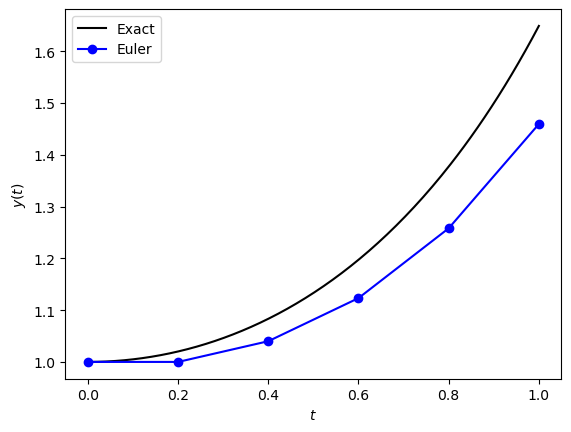

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Euler method
def euler(f, tspan, y0, h):
    
    nsteps = int((tspan[1] - tspan[0]) / h)
    t = np.zeros(nsteps + 1)
    y = np.zeros(nsteps + 1)
    t[0] = tspan[0]
    y[0] = y0
    
    for n in range(nsteps):
        y[n+1] = y[n] + h * f(t[n], y[n])
        t[n+1] = t[n] + h

    return t, y


# Define ODE function and the exact solution
def f(t,y):
    return t * y

def exact(t):
    return np.exp(t ** 2 / 2)


# Define IVP parameters
tspan = [0, 1]
y0 = 1
h = 0.2

# Solve IVP
t, y = euler(f, tspan, y0, 0.2)

# Output table
print("| $t$ |  Euler   |  Exact   |  Error   |")
print("|:---:|:--------:|:--------:|:--------:|")
for n in range(len(t)):
    print(f"| {t[n]:0.1f} | {y[n]:0.6f} | {exact(t[n]):0.6f} | {abs(exact(t[n]) - y[n]):0.6f} |")

# print(f"* - $t$\n  - Euler\n  - Exact\n  - Error")
# for n in range(len(t)):
#     print(f"* - {t[n]:0.1f}\n  - {y[n,0]:0.6f}\n  - {exact(t[n]):0.6f}\n  - {abs(exact(t[n]) - y[n,0]):0.2e}")

# Plot solutions
texact = np.linspace(tspan[0], tspan[1], 200)
yexact = exact(texact)

fig, ax = plt.subplots()
plt.plot(texact, yexact, "k", label=f"Exact")
plt.plot(t, y, "bo-", label=f"Euler")
plt.xlabel("$t$")
plt.ylabel("$y(t)$")
plt.legend()

from myst_nb import glue
glue("euler_example_exact_plot", fig, display=False)

## Changing the step length

Analysing the error of a numerical method is a challenge since in most cases we do not know the exact solution. Instead, we study the behaviour of the error as the step length changes. Recall the [Euler method](euler-method-section)

$$y_{n+1} = y_n + h f(t_n, y_n).$$

The solution over a single time step is changed from the current solution $y_n$ by $h$ multiplied by the value of $f(t_n, y_n)$. If we assume that that value of $y_n$ has some error associated to it then the error will also be changed by $h$ multiplied by some value. Therefore, the smaller the value of $h$ then the smaller the change in the error converging to zero when $h$ is infinitesimally small.

We can demonstrate this by looking at the solutions to the initial value problem from {prf:ref}`euler-example` using different values of the step length $h$. The numerical solutions using $h=0.2, 0.1, 0.05, 0.005$ have been plotted against the exact solution in {numref}`euler-example-hvals-figure`. 

```{glue:figure} euler_hvals_plot
:name: euler-example-hvals-figure
:figwidth: 600

Solutions to the IVP $y'=ty$, $t \in [0,1]$, $y(0)=1$ using the Euler method with step lengths $h=0.2, 0.1, 0.05, 0.005$.
```

Here we can see that as the step length is reduced, the solution gets closer to the exact solution as expected. The absolute errors between the exact solution $y(1) = e^{\frac{1}{2}}$ and the Euler method solution calculated using the different step lengths are tabulated below.

|  $h$  | Error  |
|:-----:|:------:|
| 0.200 | 0.1895 |
| 0.100 | 0.1016 |
| 0.050 | 0.0528 |
| 0.025 | 0.0269 |

This shows that as the step length is halved, the error decreases by a factor of approximately one half. This behaviour can be seen in {numref}`euler-example-errors-figure` where the absolute errors between the numerical solutions for $y(1)$ and the exact solution is plotted against the step length. 

```{glue:figure} euler_hvals_errors_plot
:name: euler-example-errors-figure
:figwidth: 600

Solutions to the IVP $y'=ty$ using step lengths $h=0.2, 0.1, 0.05, 0.005$.
```


|  $h$  | Error  |
|:-----:|:------:|
| 0.200 | 0.1895 |
| 0.100 | 0.1016 |
| 0.050 | 0.0528 |
| 0.025 | 0.0269 |


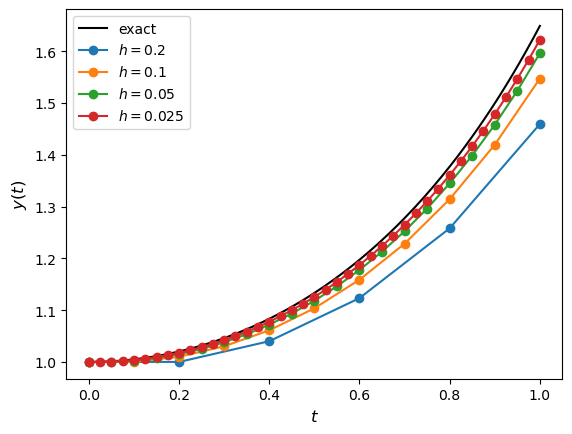

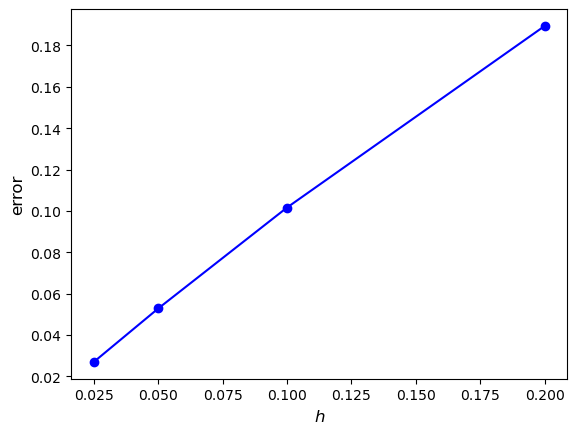

In [ ]:

# Plot exact solution
fig, ax = plt.subplots()
plt.plot(texact, yexact, "k", label=f"exact")

# Loop through h values and plot Euler method solutions
hvals = [ 0.2, 0.1, 0.05, 0.025 ]
errors = []
for h in hvals:
    t, y = euler(f, tspan, y0, h)
    errors.append(abs(exact(t[-1]) - y[-1]))
    plt.plot(t, y, "o-", label=f"$h = {h}$")

plt.xlabel("$t$", fontsize=12)
plt.ylabel("$y(t)$", fontsize=12)
plt.legend()
glue("euler_hvals_plot", fig, display=False)

# Output table of errors
print("|  $h$  | Error  |")
print("|:-----:|:------:|")
for i in range(len(hvals)):
    print(f"| {hvals[i]:0.3f} | {errors[i]:0.4f} |")

# Plot errors
fig, ax = plt.subplots()
plt.plot(hvals, errors, "bo-", label=f"exact")
plt.xlabel("$h$")
plt.ylabel("error")
glue("euler_hvals_errors_plot", fig, display=False)

(big-o-notation-section)=

## Big-O notation

We saw in {numref}`euler-example-errors-figure` that has the step length $h$ decreases, the error tends to zero. Different numerical methods will converge to zero at different rates, and it is advantageous for us to use methods that converge raster so that we have more accurate solutions. Since in most cases we do not know the exact solution and therefore cannot calculate the errors, we compare the accuracy of different methods using the expected rate of convergence to zero depending on the step length $h$, which is known as <a href="https://en.wikipedia.org/wiki/Big_O_notation" target="_blank">big-O notation</a>.

````{prf:definition} Big-O notation
:label: big-o-notation-definition

Let $f(h)$ be a function then if $f(h) = O(h^n)$

$$\lim_{h \to 0} f(h) = Ch^n$$

for some positive constant $C$.
````

If a function $f(h)$ is $f(h) = O(h^n)$ then this means $f(h)$ tends to zero at least as fast as $h^n$. For example, if $f(h) = O(h)$ then, if we halve $h$ then we would expect $f(h)$ to also be halved since $(\frac{1}{2})^1 = \frac{1}{2}$ (known as *linear convergence*), however if $f(h) = O(h^2)$ then, if we halve $h$ then the value of $f(h)$ would decrease by a factor of $\frac{1}{4}$ since $(\frac{1}{2})^2 = \frac{1}{4}$ (known as *quadratic convergence*). So the higher the power of $h$ the quicker the function $f(h)$ converges to zero as $h$ decreases. 

Since the error of a numerical method is dependent upon the step length $h$ then we can say that it behaves like a polynomial function, and we can approximate the error using $f(h) = O(h^n)$.

```{prf:definition} Order of a method
:label: order-definition

If the error of a numerical method is $O(h^n)$ then the method is said to be of order $n$.
```

In general, the higher the order of a method, the more accurate the solution will be when using the same step length $h$. 

---

(local-truncation-error-section)=

## Local truncation Error

The **local truncation error**, denoted by $e_n$, is the error over a single step of a method assuming that the solution at the previous step is exact. In the [derivation of the Euler method](euler-method-section) we made the assumption that the computed value of $y_{n+1}$ is an approximation of the exact solution $y(t_{n+1})$. The local truncation error for this step is the difference between $y_{n+1}$ and $y(t_{n+1})$

$$ \begin{align*}
    e_{n} &= y(t_{n+1}) - y_{n+1}.
\end{align*} $$

where $y_n = y(t_n)$. Substituting the Euler method solution of $y_{n+1}$ gives

$$ \begin{align*}
   e_n &= y(t_{n+1}) - y(t_n) - h f(t_n, y(t_n)).
\end{align*} $$(euler-tau-equation-1)

Since $y(t_{n+1}) = y(t_n + h)$, we can expand $y(t_{n+1})$ about $t_n$ using the <a href="https://en.wikipedia.org/wiki/Taylor%27s_theorem" target="_blank">Taylor's series</a>

$$ y(t_{n+1}) = y(t_n) + h y'(t_n) + \frac{h^2}{2} y''(\tilde{t_n}), $$(euler-taylor-equation)

where $\tilde{t_n}$ is some point between $t_{n}$ and $t_{n} + h$. Since $y'(t_n) = f(t_n, y_n)$, substituting equation {eq}`euler-taylor-equation` into equation {eq}`euler-tau-equation-1` gives

$$ \begin{align*}
    e_n &= y(t_n) + h f(t_n, y(t_n)) + \frac{h^2}{2} y''(\tilde{t_n}) - y(t_n) - h f(t_n, y(t_n)) \\
    &=\frac{h^2}{2} y''(\tilde{t_n}).
\end{align*} $$

So the local truncation error for the Euler method is proportional to $h^2$. The actual value of the local truncation error is dependent on the value of $y''(\tilde{t_n})$ so will change depending on the solution to the ODE and the value of $t$. Assuming that the functions $f$ and its partial derivatives $f_t$ and $f_y$ are bounded, we can introduce a constant $M$ such that

$$ | e_n | \leq \frac{Mh^2}{2}. $$

This means that the worst possible truncation error for the Euler method is $\dfrac{M h^2}{2}$. 

---

(global-truncation-error-section)=

## Global truncation error

The global truncation error denoted by $E_n$, is the accumulation of the local truncation errors for the steps of the method to compute that solution from $t=t_0$ up to $t = t_n$ ({numref}`euler-global-errors-figure`). 


```{glue:figure} euler_global_error_figure
:name: euler-global-errors-figure
:figwidth: 600

The global truncation errors $E_n$ for the Euler method solution to the IVP $y' = ty$, $t\in [0, 1]$, $y(0)= 1$ using a step length of $h = 0.2$.
```

We saw that the local truncation error at each step is at most $\dfrac{Mh^2}{2}$ then after $n$ steps the upper bound of the global truncation error is at most $\dfrac{nMh^2}{2}$. Using a constant step length $h$ then 

$$n = \frac{t_n - t_0}{h}, $$

so the upper bound of the global truncation error is

$$ E_n \leq \frac{t_n - t_0}{h} \frac{Mh^2}{2} = \frac{(t_n - t_0 )M}{2} h. $$

If $C = (t_n - t_0 ) M / 2$ is some positive constant then $E_n \leq C h$ so we say that $E_n = O(h)$. So as the step length $h$ decreases, the global truncation error for Euler's method will converge to zero in a linear fashion, that is, halving the step length should also approximately halve the global truncation error. This confirms what we saw in the plot of the errors against step length for the Euler method ({numref}`euler-example-errors-figure`) where the errors formed a line with a gradient of approximately 2. 

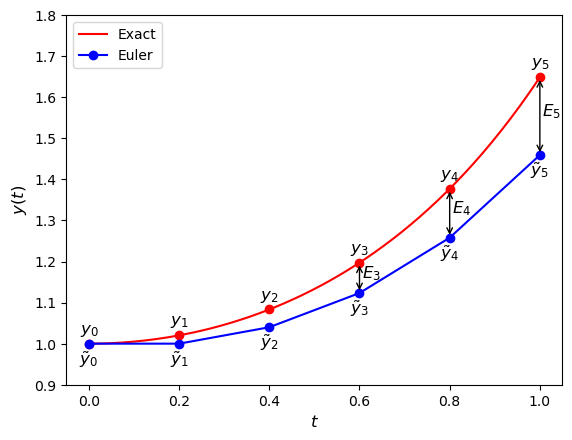

In [78]:
h = 0.2         # step length

# Calculate the solution to the IVP
t, y = euler(f, tspan, y0, h)
    
# Plot solution
texact = np.linspace(tspan[0], tspan[1], 200)
fig, ax = plt.subplots()
plt.plot(texact, exact(texact), "r-", label="Exact")
plt.plot(t, exact(t), "ro")
plt.plot(t, y, "bo-", label="Euler")
for i in range(len(t)):
    plt.text(t[i], y[i] - 0.05, rf"$\tilde{{y}}_{i}$", fontsize=12, ha="center")
    plt.text(t[i], exact(t[i])+0.025, f"$y_{i}$", fontsize=12, ha="center")
    if i > 2:
        plt.text(t[i]+0.005, y[i]/2 + exact(t[i])/2, f"$E_{i}$", fontsize=12)
        plt.annotate("", xy=(t[i],y[i]), xytext=(t[i],exact(t[i])), arrowprops=dict(arrowstyle="<->"))

plt.ylim([0.9, 1.8])
plt.xlabel("$t$", fontsize=12)
plt.ylabel("$y(t)$", fontsize=12)
plt.legend(loc="upper left")
plt.show()

from myst_nb import glue
glue("euler_global_error_figure", fig, display=False)